# **Introduction**
This project aims to harness the power of machine learning to predict volume loss in experimental tooth specimen due to various factors in an in vitro setting. By analyzing data from previous studies and applying sophisticated modeling techniques, we intend to develop a predictive model that estimates the extent of volume loss under different experimental conditions. Such volume loss is indicative of tooth wear in the cervical areas, potentially leading to non-carious cervical lesions.

The primary goal of this model is to identify combinations of variables that lead to the highest abrasivity, thereby prioritizing them for actual in vitro testing. This approach will significantly streamline the experimental process, allowing for the selective testing of the most promising conditions first. By reducing the number of necessary tests, this model aims to cut both the time and costs associated with experimental abrasivity studies by at least 50%. Consequently, this will enhance efficiency in research processes and accelerate the development of dental care products by identifying optimal conditions for further investigation without the need for extensive preliminary testing.



# 1. **Data Preprocessing**

Data processing is an important step in machine learning, during this we convert variables in different data type to numerical values for the model to learn easily.

We have used two types of conversions below:


*   
 One-hot encoding is a process that converts categorical variables into a form that algorithms can better understand. . Instead of having one column with many labels, one-hot encoding creates multiple binary columns for each category/level, this removed any ordinal relationship that might be misinterpreted by model . For instance, any kind of toothbrush here should have the same value but numbering them would give them weights.

*   For variables like abrasivity, brushing strokes, and acid exposure, converting them into numerical values allows the model to easily quantify the effects of these variables on tooth wear.
By assigning higher numbers to higher abrasivity levels, the model can understand that higher values have a greater potential impact on tooth wear, which can be directly used in regression calculations.


In [ ]:
import pandas as pd
file_path = "/content/Prediction of NCCLs.xlsx"
sheet2_data = pd.read_excel(file_path, sheet_name='Sheet2')

# Create a dictionary to map toothpaste names to their abrasivity levels
abrasivity_mapping = {
    "Zeodent 103": "high",
    "Zeodent 113": "low",
    "Zeodent 124": "mid",
    "Sensodyne Pronamel": "low",
    "Crest Cavity Protection": "mid",
    "Crest Pro-Health Whitening TP": "high",
    "De-ionized water": "Zero"
}

# Preprocess the Toothpaste column: remove anything in parentheses and strip spaces
sheet2_data['Toothpaste_Cleaned'] = sheet2_data['Toothpaste'].str.replace(r"\(.*\)", "", regex=True).str.strip()

# Map the cleaned Toothpaste column to abrasivity levels
sheet2_data['Toothpaste_Abrasivity'] = sheet2_data['Toothpaste_Cleaned'].map(abrasivity_mapping)

# Display the updated DataFrame
print(sheet2_data[['Toothpaste', 'Toothpaste_Abrasivity']].head())

#coverting abrasivity into numerical column
abrasivity_mapping_numerical = {
    "high": 3,
    "mid": 2,
    "low": 1,
    "Zero": 0
}
sheet2_data ['Toothpaste_Abrasivity_numerical'] = sheet2_data['Toothpaste_Abrasivity'].map(abrasivity_mapping_numerical)

#Converting Brushing strokes to numerical column
Strokes_mapping = {
    "5K": 5000,
    "10K": 10000,
    "15K": 15000,
    "20K": 20000,
    "35K": 35000,
    "55K": 55000,
    "65K": 65000,
}
sheet2_data ['Brushing_Strokes_numerical'] = sheet2_data['Brushing stroKes'].map(Strokes_mapping)

#Converting Head to Numerical column - one hot encoding - because it has 3+ unique values
head_dummies = pd.get_dummies(sheet2_data['Head'], prefix='Head')
sheet2_data = pd.concat([sheet2_data, head_dummies], axis=1)

#Converting Bristles to Numerical Column
Bristles_mapping = {
    "Soft" : 1,
    "Mid" : 2,
    "Hard" : 3
}

sheet2_data ['Bristles_numerical'] = sheet2_data['Bristles'].map(Bristles_mapping)

#Converting acid to Numerical Column
Acid_mapping = {
    "0" : 0,
    "0.3% CA" : 1,
    "1% CA" : 2,
}

sheet2_data ['Acid_numerical'] = sheet2_data['Acid'].map(Acid_mapping)

#Converting Treatment to Numerical
Treatment_mapping = {
    "0" : "0",
    "Experimental" : "1",
    "Clearfil" : "1" #treatment yes/no: 0 - no treatment, experimental/clearfil - treatment - 1
}
sheet2_data ['Treatment_numerical'] = sheet2_data['Treatment'].map(Treatment_mapping)

# Save the updated DataFrame to a new file
sheet2_data.to_csv("Updated_Sheet2.csv", index=False)
print("Updated file saved as 'Updated_Sheet2.csv'")

           Toothpaste Toothpaste_Abrasivity
0  Zeodent 113 (low)                    low
1  Zeodent 113 (low)                    low
2  Zeodent 113 (low)                    low
3  Zeodent 113 (low)                    low
4  Zeodent 113 (low)                    low
Updated file saved as 'Updated_Sheet2.csv'


**1.1.1 Handling Missing values and dropping irrelavant columns**




Handling missing values and irrelevant columns in data is crucial for maintaining the integrity and effectiveness of machine learning models.
It's similar to ensuring that all ingredients in a recipe are fresh and relevant to the dish you're making—using spoiled or inappropriate ingredients can ruin the flavor and outcome.

Missing values can lead to inaccurate calculations and predictions. Eliminating irrelevant or unnecessary features can simplify the model, making it faster and less costly to train. Imagine if you included the color of a car as a variable when trying to predict its fuel efficiency. Color has no impact on fuel efficiency, so including it only complicates the model without adding value.

In [ ]:
df = pd.read_csv("Updated_Sheet2.csv")
df.drop(['Specimen', 'Head','Study ', 'Toothpaste_Cleaned', 'Brushing stroKes', 'Toothpaste', 'Bristles', 'Acid', 'Treatment', 'Toothpaste_Abrasivity'], axis=1, inplace=True)


# Fill NaN values in the specified columns using a dictionary with the fillna method
df.fillna({'Acid_numerical': 0, 'Treatment_numerical': 0}, inplace=True)
columns_of_interest = [
    'Load', 'Exp.Time (min)',
    'Toothpaste_Abrasivity_numerical', 'Brushing_Strokes_numerical',
    'Head_Cross-multi-flex', 'Head_Cross-multi-rubbers', 'Head_Feathered',
    'Head_Flat-trimmed', 'Head_Rippled', 'Bristles_numerical',
    'Acid_numerical', 'Treatment_numerical', 'Vol loss (mm3)'
]

# Subset the data
eda_data = df[columns_of_interest]

# Display basic info
print(eda_data.info())
print(eda_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Load                             2477 non-null   int64  
 1   Exp.Time (min)                   2477 non-null   int64  
 2   Toothpaste_Abrasivity_numerical  2477 non-null   int64  
 3   Brushing_Strokes_numerical       2477 non-null   int64  
 4   Head_Cross-multi-flex            2477 non-null   bool   
 5   Head_Cross-multi-rubbers         2477 non-null   bool   
 6   Head_Feathered                   2477 non-null   bool   
 7   Head_Flat-trimmed                2477 non-null   bool   
 8   Head_Rippled                     2477 non-null   bool   
 9   Bristles_numerical               2477 non-null   int64  
 10  Acid_numerical                   2477 non-null   float64
 11  Treatment_numerical              2477 non-null   float64
 12  Vol loss (mm3)      

In [ ]:
# Check missing values
missing_values = eda_data.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)


Missing Values:
 Load                               0
Exp.Time (min)                     0
Toothpaste_Abrasivity_numerical    0
Brushing_Strokes_numerical         0
Head_Cross-multi-flex              0
Head_Cross-multi-rubbers           0
Head_Feathered                     0
Head_Flat-trimmed                  0
Head_Rippled                       0
Bristles_numerical                 0
Acid_numerical                     0
Treatment_numerical                0
Vol loss (mm3)                     0
dtype: int64


**1.1.2 Check Feature Distribution and Skewness**

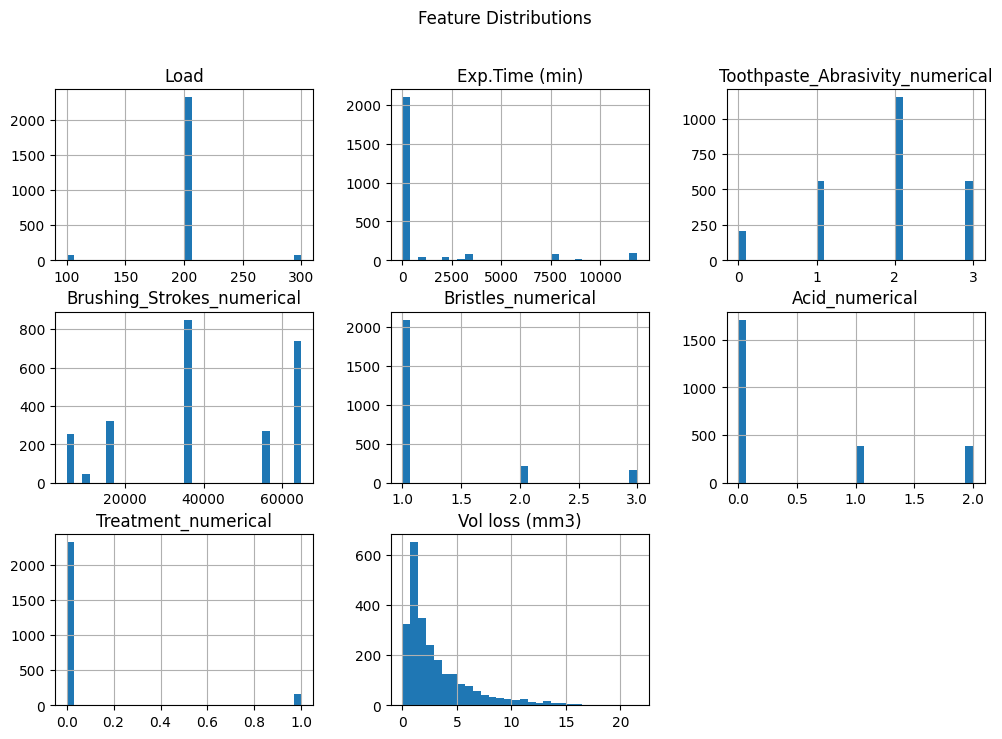

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
eda_data.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


Few of our variables like Exp. time (min) have skewed data and this would cause poor model generalization in later stages. Log transformation of these variables would help handle the outliers better leading to better model training.
For the brushing strokes column, log transformation converted a lot of values to NaN, so using Robust scaler for scaling.

In [ ]:
#Log transformation for skewed variables
import numpy as np

# Apply log1p transformation to selected features
eda_data["Exp.Time (min)"] = np.log1p(eda_data["Exp.Time (min)"])

# Before transformation summary
print("Before Log Transformation:")
print(df[["Exp.Time (min)"]].describe())

# After transformation summary
print("After Log Transformation:")
print(eda_data[["Exp.Time (min)"]].describe())



Before Log Transformation:
       Exp.Time (min)
count     2477.000000
mean       951.570448
std       2726.773940
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11880.000000
After Log Transformation:
       Exp.Time (min)
count     2477.000000
mean         1.558561
std          3.097082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.382696


**1.1.3 Scaling using Robust Scaler to handle outliers**

In [ ]:
from sklearn.preprocessing import RobustScaler

# Select only numerical columns that need scaling
scaling_columns = ["Load", "Exp.Time (min)", "Brushing_Strokes_numerical"]

# Apply RobustScaler
scaler = RobustScaler()
eda_data[scaling_columns] = scaler.fit_transform(eda_data[scaling_columns])

# Print summary after scaling
print("RobustScaler applied:")
print(eda_data[scaling_columns].describe())


RobustScaler applied:
              Load  Exp.Time (min)  Brushing_Strokes_numerical
count  2477.000000     2477.000000                 2477.000000
mean     -0.121114        1.558561                    0.098345
std      25.180798        3.097082                    0.421266
min    -100.000000        0.000000                   -0.600000
25%       0.000000        0.000000                   -0.400000
50%       0.000000        0.000000                    0.000000
75%       0.000000        0.000000                    0.600000
max     100.000000        9.382696                    0.600000


Since the columns in our dataset like Toothpaste_abrasivity, Bristles_numerical, Acid and Treatment are categorical ordinal, they should not be  scaled since we will be using tree based models.

### **1.2 Creating Interaction features**

**1.2.1 Polynomial model vs Linear model to check the relation between features and target.**

We need to create interaction features for our models to better learn the patterns of our data. However to create appropriate interaction feature we first need to know the relation between the feature and the target, if linear we create interaction terms and if non linear - Polynomial terms.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Select numerical columns (excluding target)
numerical_features = ["Load", "Exp.Time (min)", "Brushing_Strokes_numerical",
                      "Toothpaste_Abrasivity_numerical", "Acid_numerical"]

# Fit Linear and Polynomial Regression for each feature
results = []
for col in numerical_features:
    X = eda_data[[col]]
    y = eda_data["Vol loss (mm3)"]

    # Linear Model
    lin_model = LinearRegression().fit(X, y)
    lin_pred = lin_model.predict(X)
    lin_r2 = r2_score(y, lin_pred)

    # Polynomial Model (Degree 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression().fit(X_poly, y)
    poly_pred = poly_model.predict(X_poly)
    poly_r2 = r2_score(y, poly_pred)

    results.append({"Feature": col, "Linear R²": lin_r2, "Polynomial R²": poly_r2})

# Convert to DataFrame
poly_results = pd.DataFrame(results).set_index("Feature").sort_values(by="Polynomial R²", ascending=False)

poly_results.head()

,Linear R²,Polynomial R²
Feature,,
Toothpaste_Abrasivity_numerical,0.223282,0.237668
Brushing_Strokes_numerical,0.162952,0.162963
Acid_numerical,0.012759,0.024505
Exp.Time (min),0.014747,0.015175
Load,0.000058,0.000187


From the comparison above:


**Toothpaste_Abrasivity_numerical**	- Since there is only a small difference it can be said to be linear.

**Brushing_Strokes_numerical**: No difference so it could be said to have a linear relationship.

**Acid_numerical**:
There is a moderate difference so it could be said to have a weak non linear relationship.

**Exp.Time(min)**: Seems to have a weak non linear relationship.

**Load**: It has very low values of r-squared which suggests that there might not be any relationship between load and volume loss. This could be because load was constant in most of the studies.




**1.2.2 Compare Pearson and Spearman correlation**

In [ ]:
# Compute correlation comparisons
correlation_results = pd.DataFrame({
    "Feature": [col for col in columns_of_interest if col != "Vol loss (mm3)"],
    "Pearson Correlation": [eda_data[col].corr(eda_data["Vol loss (mm3)"], method="pearson") for col in columns_of_interest if col != "Vol loss (mm3)"],
    "Spearman Correlation": [eda_data[col].corr(eda_data["Vol loss (mm3)"], method="spearman") for col in columns_of_interest if col != "Vol loss (mm3)"]
})

# Display correlation comparison
print(correlation_results)


                            Feature  Pearson Correlation  Spearman Correlation
0                              Load             0.007612              0.001774
1                    Exp.Time (min)             0.121436              0.076114
2   Toothpaste_Abrasivity_numerical             0.472527              0.508557
3        Brushing_Strokes_numerical             0.403673              0.465288
4             Head_Cross-multi-flex            -0.006382              0.053914
5          Head_Cross-multi-rubbers             0.089561              0.134720
6                    Head_Feathered            -0.020148              0.058930
7                 Head_Flat-trimmed            -0.055471             -0.189612
8                      Head_Rippled             0.038859              0.099728
9                Bristles_numerical             0.062785              0.033566
10                   Acid_numerical             0.112958              0.079588
11              Treatment_numerical            -0.16

**Toothpaste_Abrasivity_numerical**: There is almost no difference between the two correlations this shows a linear relationship.

**Brushing_Strokes_numerical**:
Pearson is almost equal to spearman so this also can be said to have a linear relationship with the target.

**Acid_numerical**:
There is a weak negative correlation between spearman and pearson so it can be said to have a weak non-linear correlation.

**Exp.time(min)**: This has a weak correlation, since the value of spearman correlation is 0.076.

Treatment_numerical and Head Features are binary categorical variable so shouldn't be considered for creating polynomial terms. These can be used in creating interaction terms.

**1.2.2 Creating Interaction terms**

In [ ]:
# Created interaction terms based on literature findings
eda_data["BrushingStrokes_Abrasivity"] = eda_data["Brushing_Strokes_numerical"] * eda_data["Toothpaste_Abrasivity_numerical"]
eda_data["Acid_Strokes"] = eda_data["Acid_numerical"] * eda_data["Brushing_Strokes_numerical"]
eda_data["Acid_Abrasivity"] = eda_data["Acid_numerical"] * eda_data["Toothpaste_Abrasivity_numerical"]
eda_data["Abrasivity_ToothbrushType"] = eda_data["Toothpaste_Abrasivity_numerical"] * eda_data["Bristles_numerical"]
eda_data["Load_Abrasivity"] = eda_data["Load"] * eda_data["Toothpaste_Abrasivity_numerical"]
eda_data["Acid_ExpTime"] = eda_data["Acid_numerical"] * eda_data["Exp.Time (min)"]
eda_data["Bristles_Abrasivity"] = eda_data["Bristles_numerical"] * eda_data["Toothpaste_Abrasivity_numerical"]
eda_data["Bristles_Strokes"] = eda_data["Bristles_numerical"] * eda_data["Brushing_Strokes_numerical"]

# Confirm feature creation
print(eda_data[["BrushingStrokes_Abrasivity", "Acid_Strokes", "Acid_Abrasivity", "Abrasivity_ToothbrushType", "Load_Abrasivity", "Acid_ExpTime", "Bristles_Abrasivity", "Bristles_Strokes"]].head())


   BrushingStrokes_Abrasivity  Acid_Strokes  Acid_Abrasivity  \
0                        -0.6          -0.0              0.0   
1                        -0.6          -0.0              0.0   
2                        -0.6          -0.0              0.0   
3                        -0.6          -0.0              0.0   
4                        -0.6          -0.0              0.0   

   Abrasivity_ToothbrushType  Load_Abrasivity  Acid_ExpTime  \
0                          1              0.0           0.0   
1                          1              0.0           0.0   
2                          1              0.0           0.0   
3                          1              0.0           0.0   
4                          1              0.0           0.0   

   Bristles_Abrasivity  Bristles_Strokes  
0                    1              -0.6  
1                    1              -0.6  
2                    1              -0.6  
3                    1              -0.6  
4                    

**1.2.3 Polynomial terms for the non linear variables:**

In [ ]:
# Create polynomial terms (degree 2) for non-linear relationships
eda_data["Acid_Squared"] = eda_data["Acid_numerical"] ** 2
eda_data["ExpTime_Squared"] = eda_data["Exp.Time (min)"] ** 2

# Confirm feature creation
print(eda_data[["Acid_Squared", "ExpTime_Squared"]].head())


   Acid_Squared  ExpTime_Squared
0           0.0              0.0
1           0.0              0.0
2           0.0              0.0
3           0.0              0.0
4           0.0              0.0


**1.2.4 Checking Correlation after interaction terms**

In [ ]:
# Define new interaction features
new_features = ["BrushingStrokes_Abrasivity", "Acid_Strokes", "Acid_Abrasivity", "Abrasivity_ToothbrushType", "Load_Abrasivity", "Acid_ExpTime", "Acid_Squared", "ExpTime_Squared", "Bristles_Abrasivity", "Bristles_Strokes"]

# Compute Pearson & Spearman correlation for new features
correlation_after = pd.DataFrame({
    "Feature": new_features,
    "Pearson Correlation": [eda_data[col].corr(eda_data["Vol loss (mm3)"], method="pearson") for col in new_features],
    "Spearman Correlation": [eda_data[col].corr(eda_data["Vol loss (mm3)"], method="spearman") for col in new_features]
})

# Sort by Pearson correlation
correlation_after = correlation_after.set_index("Feature").sort_values(by="Pearson Correlation", ascending=False)

correlation_after

,Pearson Correlation,Spearman Correlation
Feature,,
BrushingStrokes_Abrasivity,0.538668,0.557127
Abrasivity_ToothbrushType,0.441358,0.492777
Bristles_Abrasivity,0.441358,0.492777
Bristles_Strokes,0.362633,0.456891
Acid_Strokes,0.340681,0.324210
Acid_Abrasivity,0.160441,0.091882
ExpTime_Squared,0.123150,0.076114
Acid_ExpTime,0.098326,0.076114
Acid_Squared,0.083438,0.079588


**Select the best performing interaction features:**

Brushingstrokes_abrasivity, Abrasivity_ToothbrushType, Acid_Strokes are the features that show a good improvement in correlation and can be used for model training.

Features like Acid_ExpTime and load abrasivity did not show a meaningful change compared to the original correlations so there features can be eliminated.

The polynomial terms did not improve correlation even with higher degrees, hence should not be used in modelling.



**1.3 Correlation Heatmap using selected features**

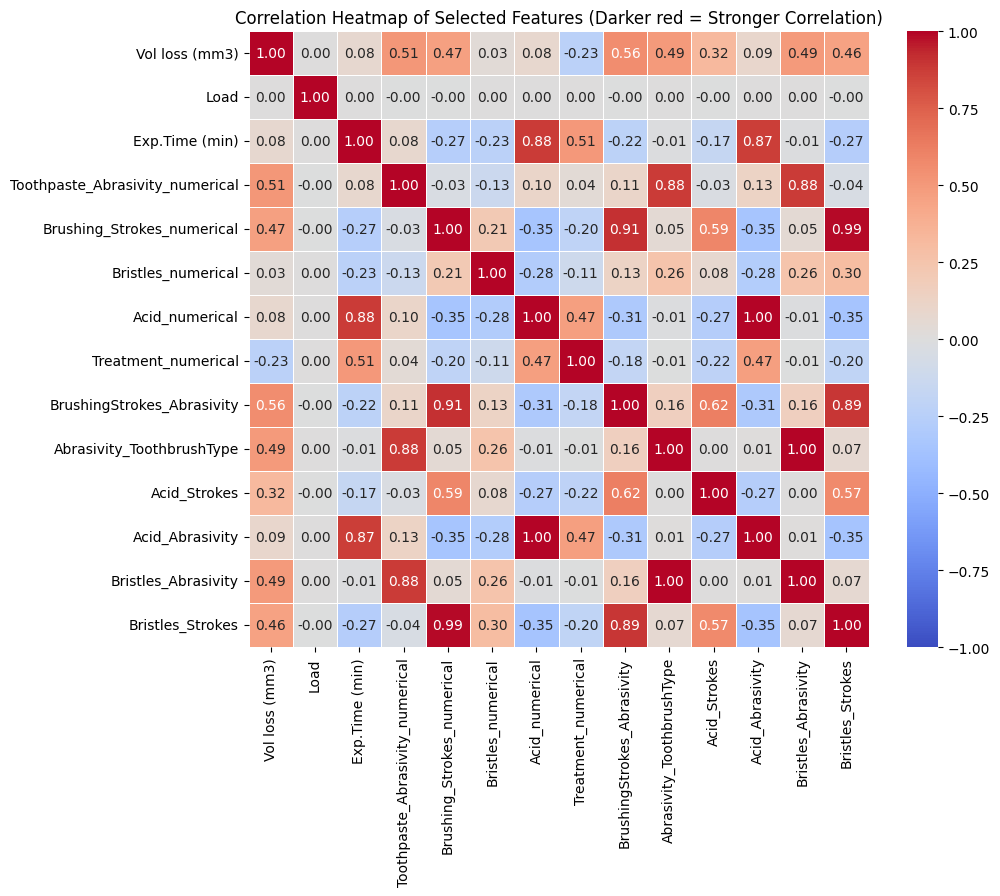

In [ ]:
selected_features = [
    "Vol loss (mm3)",
    "Load", "Exp.Time (min)", "Toothpaste_Abrasivity_numerical", "Brushing_Strokes_numerical",
    "Bristles_numerical", "Acid_numerical", "Treatment_numerical",
    "BrushingStrokes_Abrasivity", "Abrasivity_ToothbrushType", "Acid_Strokes", "Acid_Abrasivity","Bristles_Abrasivity", "Bristles_Strokes"
]

import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features
heatmap_data = eda_data[selected_features].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Set title
plt.title("Correlation Heatmap of Selected Features (Darker red = Stronger Correlation)")
plt.show()



**Volume loss across various studies**



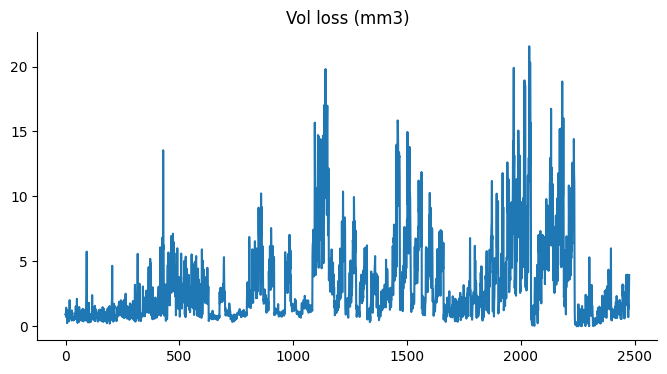

In [ ]:
# @title Vol loss (mm3)

from matplotlib import pyplot as plt
eda_data['Vol loss (mm3)'].plot(kind='line', figsize=(8, 4), title='Vol loss (mm3)')
plt.gca().spines[['top', 'right']].set_visible(False)

By establishing the strength and direction of relationships between individual variables and the target, we can set a baseline to compare against more complex models. This can help in understanding how much additional variance is explained by interaction terms and multivariable models.

# 2. **Model Training**

Since this project requires predicting continuous variable - volume loss. For a regression task on a small dataset with minimal complexity Gradient Boosting Machine (GBM), XGBoost and Randomforest would be appropriate.

**Random Forest:** It's a robust ensemble technique that uses multiple decision trees to produce a more stable and accurate prediction by averaging the results. This model is particularly effective for regression tasks because it naturally handles non-linear data with interactions between variables. Its ensemble nature makes it less likely to overfit, especially useful in scenarios with relatively small datasets.

**Gradient Boosting Machine (GBM):** GBM builds trees one at a time, where each new tree helps to correct errors made by previously trained trees. This model is known for its high effectiveness in predictive accuracy that can outperform other models, especially in datasets where relationships between variables might be nonlinear.

**XGBoost:** An extension of GBM, XGBoost has gained popularity due to its speed and performance. It implements advanced concepts in boosting algorithms, such as gradient boosting frameworks and regularization, which helps in preventing overfitting. XGBoost is particularly well-suited for regression tasks because it optimizes both prediction accuracy and computational efficiency, making it ideal for both small and large datasets




**2.1 Splitting the datset and training**


Since our data is already preprocessed we can go ahead and split the data into training, testing and validation sets.The training set is used to train the model, while the testing set is used to evaluate its performance. This split helps in validating the model’s ability to generalize to new, unseen data, which is crucial for ensuring the model’s practical applicability.

Scaling: Scaling is the process of standardizing the range of the features of data.The StandardScaler from Scikit-learn, standardizes features by removing the mean and scaling to unit variance. This means for each feature, the mean will be zero, and the variance will be one after scaling.
Machine learning algorithms perform better or converge faster when features are on a relatively similar scale and close to normally distributed. Scaling helps achieve this uniformity, which can lead to improved model performance.

**Scaling the Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Define original features (NO interaction terms)
baseline_features = [
    "Load", "Exp.Time (min)", "Toothpaste_Abrasivity_numerical", "Brushing_Strokes_numerical",
    "Bristles_numerical", "Acid_numerical", "Treatment_numerical"
]

# Define target variable
target = "Vol loss (mm3)"

# Apply RobustScaler
scaler = RobustScaler()
scaled_data = eda_data.copy()  # Create a copy to avoid modifying the original dataset
scaled_data[baseline_features] = scaler.fit_transform(eda_data[baseline_features])

# Split the dataset (AFTER scaling, using only original features and train(80%, Validation(10%), Test(10%))
X_train_base, X_temp_base, y_train_base, y_temp_base = train_test_split(
    scaled_data[baseline_features], scaled_data[target], test_size=0.2, random_state=42
)
X_val_base, X_test_base, y_val_base, y_test_base = train_test_split(
    X_temp_base, y_temp_base, test_size=0.5, random_state=42
)

# Confirm data split
print(f"Training Set: {X_train_base.shape[0]} samples")
print(f"Testing Set: {X_test_base.shape[0]} samples")
print(f"Validation Set: {X_val_base.shape[0]} samples")


Training Set: 1981 samples
Testing Set: 248 samples
Validation Set: 248 samples


**Baseline Model Training without interaction terms**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize models with default parameters
rf_baseline = RandomForestRegressor(random_state=42)
gbm_baseline = GradientBoostingRegressor(random_state=42)
xgb_baseline = XGBRegressor(random_state=42)

# Train models on original features
rf_baseline.fit(X_train_base, y_train_base)
gbm_baseline.fit(X_train_base, y_train_base)
xgb_baseline.fit(X_train_base, y_train_base)

# Store models in a dictionary
baseline_models = {
    "Random Forest": rf_baseline,
    "Gradient Boosting": gbm_baseline,
    "XGBoost": xgb_baseline
}

print("Baseline Models Trained Successfully!")


Baseline Models Trained Successfully!


In [ ]:
eda_data[baseline_features].head()

,Load,Exp.Time (min),Toothpaste_Abrasivity_numerical,Brushing_Strokes_numerical,Bristles_numerical,Acid_numerical,Treatment_numerical
0,0.0,0.0,1,-0.6,1,0.0,0.0
1,0.0,0.0,1,-0.6,1,0.0,0.0
2,0.0,0.0,1,-0.6,1,0.0,0.0
3,0.0,0.0,1,-0.6,1,0.0,0.0
4,0.0,0.0,1,-0.6,1,0.0,0.0


**Evaluation Metrics**  



Mean Squared Error (MSE): This is a direct measure of the average squared difference between the estimated values and what is estimated. MSE values are non-negative where lower values are better.

Root Mean Squared Error (RMSE) is a widely used metric for measuring the accuracy of a model in predicting quantitative data. RMSE, being a square root of MSE, increases disproportionately in response to larger errors. This means that RMSE is particularly useful when large errors are particularly undesirable, like  the task at hand.

Mean Absolute Error (MAE): Similar to MSE but measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.


R- Squared (r2_score): This is the coefficient of determination, which provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of variance explained.


**Train, Test and Validation RMSE**

Train RMSE - How well model fits the training data.

Test RMSE - Measures how well the model generalizes to unseen data.It is used to compare models.

Validation RMSE - Measures fit on unseen validation data

**Evaluation of the metrics-**

Train RMSE ≈ Validation RMSE ≈ Test RMSE → Model generalizes well.

If Train RMSE is much lower than Test RMSE → Model is overfitting.

If Test RMSE is much higher than Validation RMSE → Model is overfitting on validation and not generalizing. Validation RMSE can be used for Hyperparameter tuning without using the unseen test set which could be used later on for model evaluation.


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    metrics = {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Validation RMSE": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Validation MAE": mean_absolute_error(y_val, y_val_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Validation R²": r2_score(y_val, y_val_pred),
    }

    return metrics

# Evaluate each baseline model
baseline_results = {}
for name, model in baseline_models.items():
    baseline_results[name] = evaluate_model(model, X_train_base, y_train_base, X_val_base, y_val_base)

# Convert results to DataFrame
import pandas as pd
baseline_results_df = pd.DataFrame(baseline_results).T

baseline_results_df


,Train RMSE,Validation RMSE,Train MAE,Validation MAE,Train R²,Validation R²
Random Forest,1.750349,1.677844,1.088338,1.081341,0.696746,0.667224
Gradient Boosting,1.760953,1.671771,1.102015,1.085503,0.693061,0.669629
XGBoost,1.750253,1.677787,1.087782,1.081765,0.696780,0.667247


**K-Fold Cross Validation**

This would help ensure that our models are not overfitting adn generalize well across different subsets. Cross-validation is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set.Less variation in the performance metrics across different folds indicates more stability.

In [ ]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation on training data
def cross_validate_model(model, X_train, y_train, cv=5):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv)
    return np.mean(scores), np.std(scores)

# Perform cross-validation for each baseline model
cv_results = {}
for name, model in baseline_models.items():
    mean_rmse, std_rmse = cross_validate_model(model, X_train_base, y_train_base)
    cv_results[name] = {"Mean RMSE": -mean_rmse, "Std Dev RMSE": std_rmse}

# Convert results to DataFrame
import pandas as pd
cv_results_df = pd.DataFrame(cv_results).T

cv_results_df

,Mean RMSE,Std Dev RMSE
Random Forest,1.805139,0.142525
Gradient Boosting,1.809660,0.144084
XGBoost,1.805117,0.143452


Based on Metrics, All the models perform well equally and would need to look at the plots for validation loss, residual spread and actual vs predicted graph to determine which one is performing better.

**Training and Validation Loss**

The plot shows whether the loss decreases over time, indicating the model is learning. A loss that stops decreasing suggests the model has converged.  

If the training loss continues to decrease but the validation loss starts to increase, it suggests the model is overfitting to the training data. Conversely, if both losses are high, the model may be underfitting.

This helps in determining the point after which the model gains are minimal, guiding decisions on stopping criteria for training to prevent overfitting and undertraining.

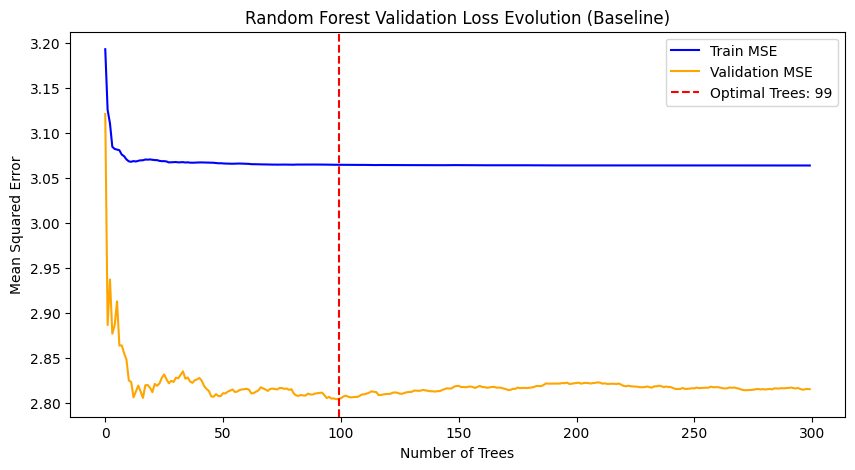

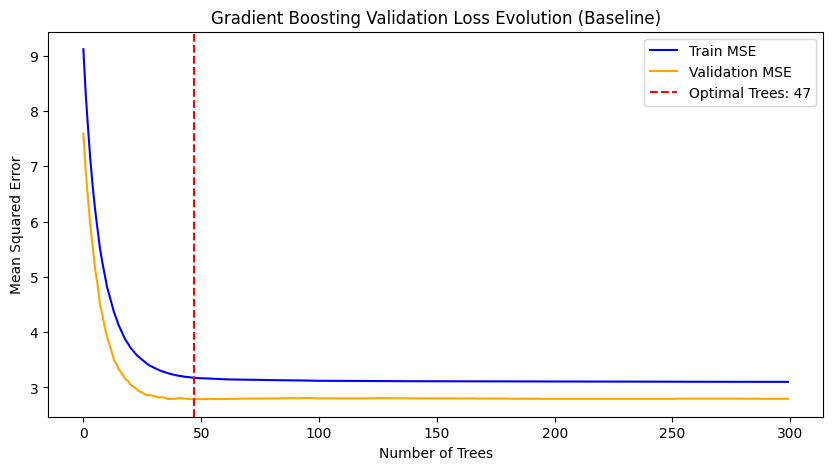

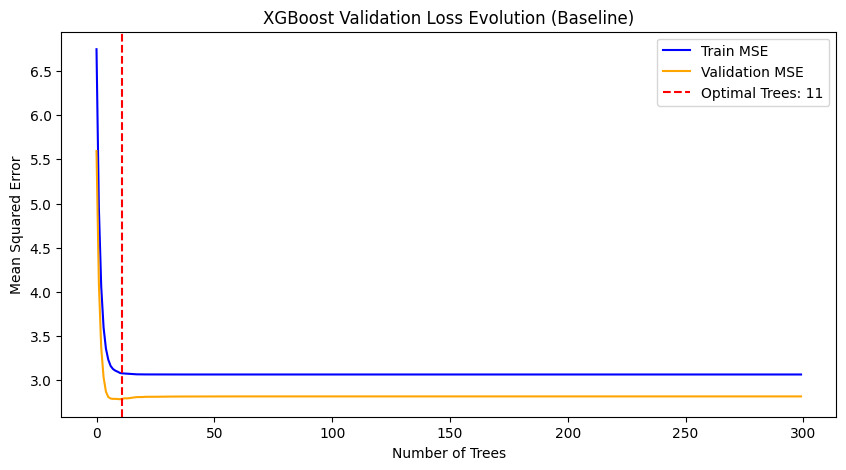

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Function to plot validation loss over epochs
def plot_validation_loss(model, model_name, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []

    for n in range(1, 301):  # Train with up to 300 trees
        model.set_params(n_estimators=n)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)  # Using validation set

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))  # Compute loss using validation set

    # Find the optimal number of trees
    optimal_trees = np.argmin(val_errors) + 1  # Best tree count (1-based index)

    # Plot the validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_errors, "b-", label="Train MSE")
    plt.plot(val_errors, "orange", label="Validation MSE")
    plt.axvline(optimal_trees, color='r', linestyle='--', label=f"Optimal Trees: {optimal_trees}")

    plt.xlabel("Number of Trees")
    plt.ylabel("Mean Squared Error")
    plt.title(f"{model_name} Validation Loss Evolution (Baseline)")
    plt.legend()
    plt.show()

# Generate validation loss plots for all baseline models
for name, model in baseline_models.items():
    plot_validation_loss(model, name, X_train_base, y_train_base, X_val_base, y_val_base)


The validation loss plot shows a large gap between the Train MSE and Validation MSE in the random forest which shows overfitting by the random forest model because random forest uses deep trees to understand the patterns in the data, but it fails to generalize on validation data.

GBM and XGBoost iteratively correct errors and make the model more generalizable, thus they have smoother plot and also show fast convergence at 11 trees for XGBoost and 47 for GBM as opposed to 99 for Random forest.

**Learning curve**

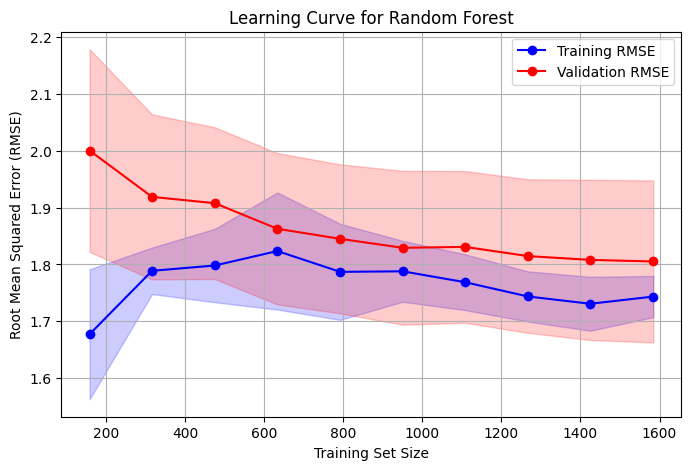

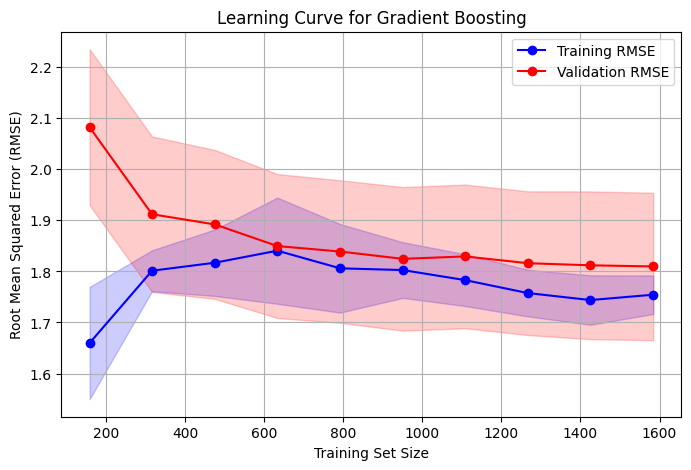

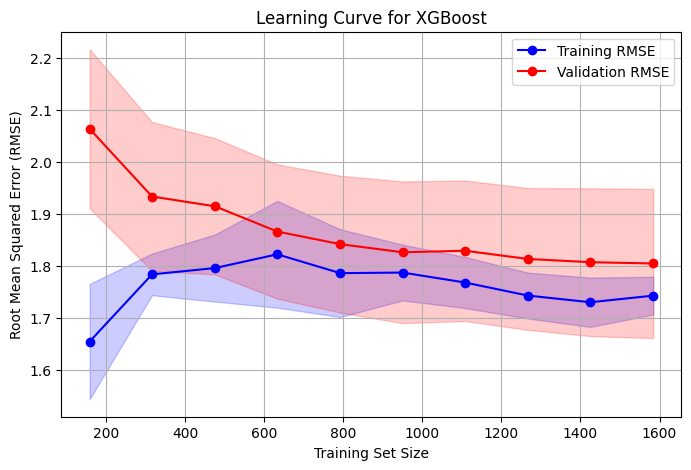

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, model_name, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring="neg_root_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, "o-", color="b", label="Training RMSE")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)

    plt.plot(train_sizes, val_mean, "o-", color="r", label="Validation RMSE")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="r", alpha=0.2)

    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.title(f"Learning Curve for {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Generate learning curves for all baseline models
for name, model in baseline_models.items():
    plot_learning_curve(model, name, X_train_base, y_train_base)


Learning curve helps us understand how well a model is learning, if the model is overfitting, underfitting or generalizing well. The present learning curves for our baseline models show that the GBM learns better than the rest two, Random forest shows a consistent overfitting, where as XGBoost performs well but has fluctuations and could be said to be overfiiting. All of these model might learn bettter with further fine tuning.

**Visualization of Residuals:**

This helps us decide how the model is performing on the data, if the fit is good. Residuals should ideally be randomly distributed and centered around zero across all levels of predictions. The variance of residuals should be consistent across all predicted values. If the variance changes (e.g., spreads out or clusters in parts of the plot), it indicates heteroscedasticity, suggesting that the model may benefit from a transformation of variables or a different modeling approach.

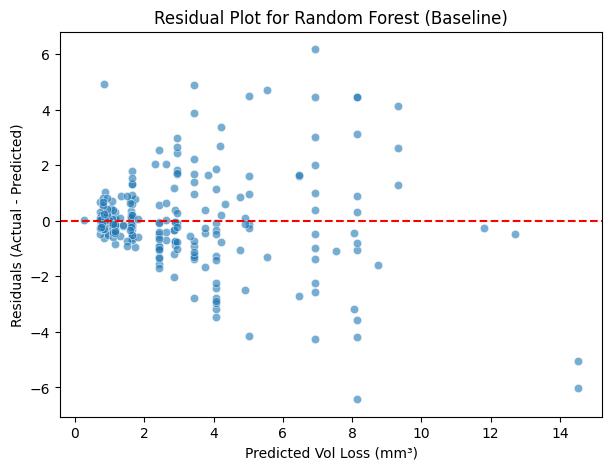

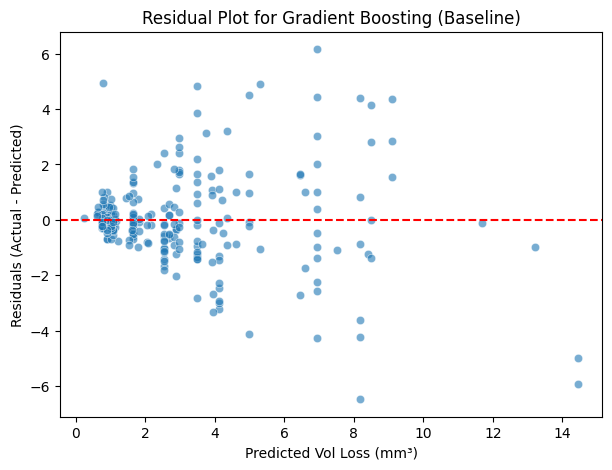

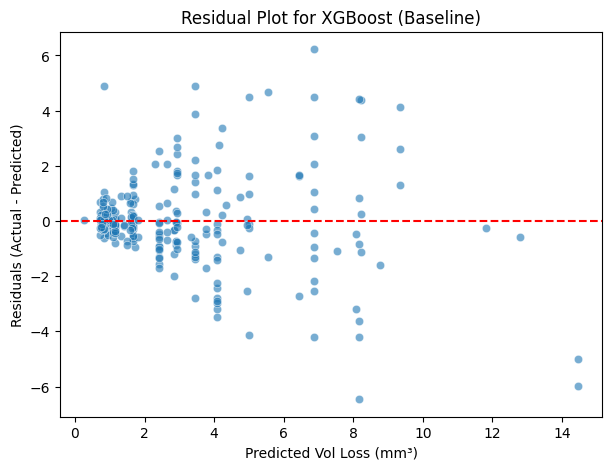

In [ ]:
import seaborn as sns

# Function to plot residuals
def plot_residuals(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    residuals = y_val - y_pred  # Compute residuals

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')  # Horizontal reference line
    plt.xlabel("Predicted Vol Loss (mm³)")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot for {model_name} (Baseline)")
    plt.show()

# Generate residual plots for all baseline models
for name, model in baseline_models.items():
    plot_residuals(model, X_val_base, y_val_base, name)


The scatterplots above show that both the model work well on the lower values of volume loss but when it comes to higher values (>10 cubic millimeters) there is an increase in the variance. The residuals for both models are scattered around the zero line, which suggests that on average, both models are doing a reasonably good job of predicting the values.

All the models have a similiar plot for the distribution of residuals and they cannot be assessed based on these plots.

**Actual vs Predicted values**

This visualization compares the actual target values from the dataset against the values predicted by the model. By plotting actual vs. predicted values, we can visually assess how close the predictions are to the actual data. A perfect model would show all points lying on a diagonal line where the actual values equal the predicted values.

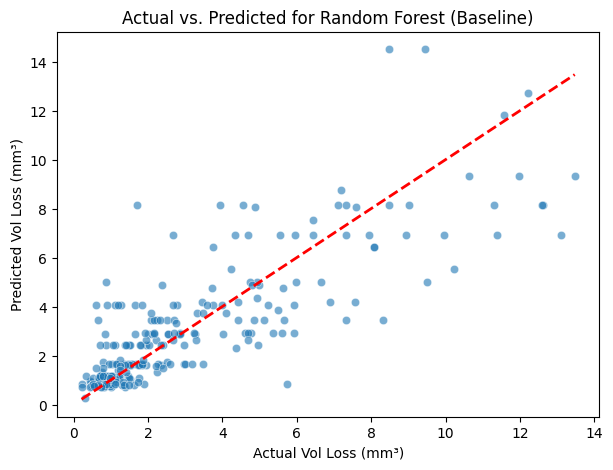

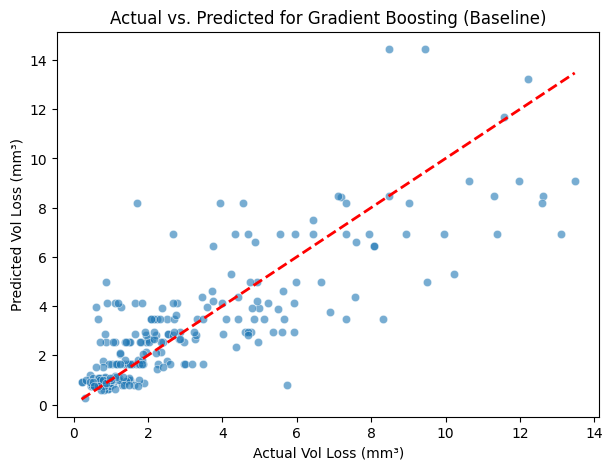

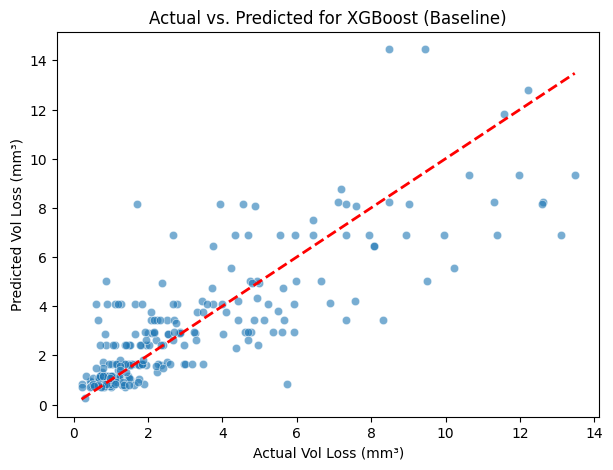

In [ ]:
# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)

    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_val, y=y_pred, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Perfect diagonal
    plt.xlabel("Actual Vol Loss (mm³)")
    plt.ylabel("Predicted Vol Loss (mm³)")
    plt.title(f"Actual vs. Predicted for {model_name} (Baseline)")
    plt.show()

# Generate scatter plots for all baseline models
for name, model in baseline_models.items():
    plot_actual_vs_predicted(model, X_val_base, y_val_base, name)


These plots show that for lower values of Volume loss the models are perfoming well and for the higher values there. All the three models are performing almost equally well in predicting the values.

Since validation of Random forest suggests overfitting, GBM and XGBoost seem to perform better on the data. GBM is computationally more demanding and XGboost converges earlier so we can select XGBoost and see how it performs on Test data.

**Final Evaluation Using Test Set**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize dictionary to store test set metrics
test_results = {}

# Compute test scores for all baseline models
for name, model in baseline_models.items():
    test_rmse = np.sqrt(mean_squared_error(y_test_base, model.predict(X_test_base)))
    test_mae = mean_absolute_error(y_test_base, model.predict(X_test_base))
    test_r2 = r2_score(y_test_base, model.predict(X_test_base))

    test_results[name] = {
        "Test RMSE": round(test_rmse, 4),
        "Test MAE": round(test_mae, 4),
        "Test R²": round(test_r2, 4)
    }

# Convert results to DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df


,Test RMSE,Test MAE,Test R²
Random Forest,1.9706,1.2304,0.6307
Gradient Boosting,1.9602,1.2255,0.6346
XGBoost,1.9712,1.2291,0.6305


Conclusion:


*   Train RMSE and Validation RMSE are close
→ No severe overfitting
*   Test RMSE is even almost equal to validation RMSE → Model generalizes well

*   Train & Val R² are reasonably high (~0.70) → Model explains a good amount of variance






**Feature Importance from the baseline models**

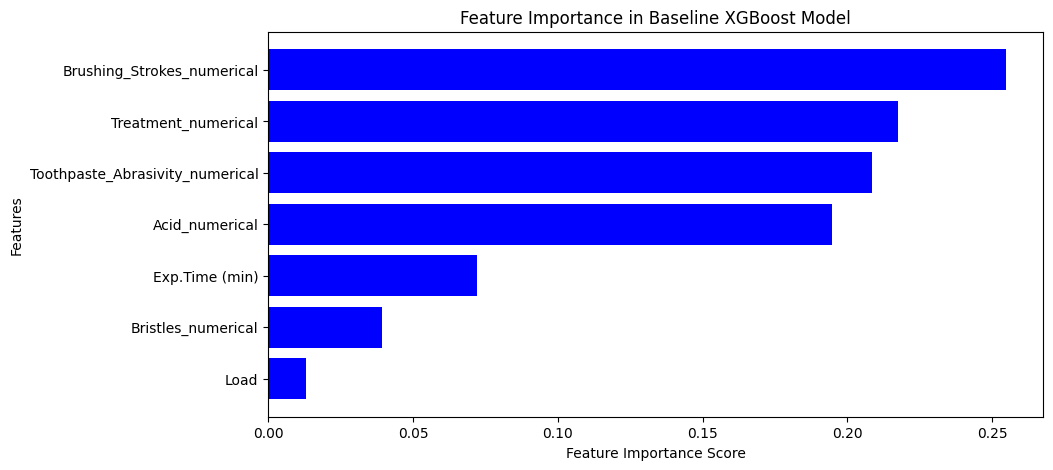

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from baseline XGBoost
importance = final_baseline_model.feature_importances_
features = X_train_base.columns

# Convert to DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Baseline XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


### **Interaction approach**

**Selecting appropriate features, scaling and splitting the dataset**

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Define selected features (including original + interaction terms)
interaction_features = [
    "Load", "Exp.Time (min)", "Toothpaste_Abrasivity_numerical", "Brushing_Strokes_numerical",
    "Bristles_numerical", "Acid_Numerical", "Treatment_numerical",
    "BrushingStrokes_Abrasivity", "Abrasivity_ToothbrushType", "Acid_Strokes",
    "Acid_Abrasivity", "Bristles_Abrasivity", "Bristles_Strokes"
]

# Define target variable
target = "Vol loss (mm3)"

# Ensure missing interaction terms are created before scaling
if "Bristles_Strokes" not in eda_data.columns:
    eda_data["Bristles_Strokes"] = eda_data["Bristles_numerical"] * eda_data["Brushing_Strokes_numerical"]

if "Acid_Numerical" not in eda_data.columns:
    eda_data["Acid_Numerical"] = eda_data["Acid_Abrasivity"] / eda_data["Toothpaste_Abrasivity_numerical"]

# Apply RobustScaler
scaler = RobustScaler()
scaled_data = eda_data.copy()  # Create a copy to avoid modifying the original dataset
scaled_data[interaction_features] = scaler.fit_transform(eda_data[interaction_features])

# Split the dataset into Train (80%) → Validation (10%) + Test (10%)
X_train_tuned, X_temp, y_train_tuned, y_temp = train_test_split(
    scaled_data[interaction_features], scaled_data[target], test_size=0.2, random_state=42
)

# Split remaining 20% into Validation (10%) and Test (10%)
X_val_tuned, X_test_tuned, y_val_tuned, y_test_tuned = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Confirm data split
print(f"Training Set: {X_train_tuned.shape[0]} samples")
print(f"Validation Set: {X_val_tuned.shape[0]} samples")
print(f"Testing Set: {X_test_tuned.shape[0]} samples")


Training Set: 1981 samples
Validation Set: 248 samples
Testing Set: 248 samples


In [ ]:
# Identify features with missing values
missing_cols = X_train_tuned.columns[X_train_tuned.isnull().any()]

# Create a new DataFrame to store fixed values
X_train_tuned_fixed = X_train_tuned.copy()

# Fill missing values based on feature type
for col in missing_cols:
    if X_train_tuned_fixed[col].dtype == "float64":  # Continuous feature
        X_train_tuned_fixed[col] = X_train_tuned_fixed[col].fillna(X_train_tuned_fixed[col].median())
    else:  # Categorical or discrete feature
        X_train_tuned_fixed[col] = X_train_tuned_fixed[col].fillna(X_train_tuned_fixed[col].mode().iloc[0])

# Replace the original dataset with the fixed version
X_train_tuned = X_train_tuned_fixed

print("Missing values handled successfully.")


Missing values handled successfully.


**Hyperparameter Tuning and Training**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor

# Initialize models
rf_tuned = RandomForestRegressor(random_state=42)
gbm_tuned = GradientBoostingRegressor(random_state=42)
xgb_tuned = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.05,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 Regularization
    reg_lambda=0.3,   # L2 Regularization
    random_state=42
)


# Define parameter grids
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

gbm_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0.01, 0.1, 1],  # L1 regularization (reduces feature importance)
    "reg_lambda": [0.3, 0.5, 0.7 ]  # L2 regularization (prevents large weights)
}

# Perform hyperparameter tuning
rf_tuned = GridSearchCV(rf_tuned, rf_param_grid, cv=5, scoring="neg_root_mean_squared_error")
gbm_tuned = RandomizedSearchCV(gbm_tuned, gbm_param_grid, cv=5, scoring="neg_root_mean_squared_error", n_iter=10) #The model with the highest negative RMSE score is the one with the lowest actual RMSE, the best model.
xgb_tuned = RandomizedSearchCV(xgb_tuned, xgb_param_grid, cv=5, scoring="neg_root_mean_squared_error", n_iter=10)

# Train models
rf_tuned.fit(X_train_tuned, y_train_tuned)
gbm_tuned.fit(X_train_tuned, y_train_tuned)
xgb_tuned.fit(X_train_tuned, y_train_tuned)

# Store models in a dictionary
tuned_models = {
    "Random Forest": rf_tuned.best_estimator_,
    "Gradient Boosting": gbm_tuned.best_estimator_,
    "XGBoost": xgb_tuned.best_estimator_
}

print("Tuned Models Trained Successfully!")


Tuned Models Trained Successfully!


In [ ]:
# Identify features with missing values
missing_cols_train = X_train_tuned.columns[X_train_tuned.isnull().any()]
missing_cols_val = X_val_tuned.columns[X_val_tuned.isnull().any()]
missing_cols_test = X_test_tuned.columns[X_test_tuned.isnull().any()]

# Fill missing values for Training, Validation, and Test sets
def fill_missing_values(df, missing_cols):
    df_fixed = df.copy()
    for col in missing_cols:
        if df_fixed[col].dtype == "float64":  # Continuous feature
            df_fixed[col] = df_fixed[col].fillna(df_fixed[col].median())
        else:  # Categorical or discrete feature
            df_fixed[col] = df_fixed[col].fillna(df_fixed[col].mode().iloc[0])
    return df_fixed

# Apply fixes
X_train_tuned = fill_missing_values(X_train_tuned, missing_cols_train)
X_val_tuned = fill_missing_values(X_val_tuned, missing_cols_val)
X_test_tuned = fill_missing_values(X_test_tuned, missing_cols_test)

# Verify if missing values are fully removed
print(f" Missing Values in Training Set: {X_train_tuned.isnull().sum().sum()}")
print(f"Missing Values in Validation Set: {X_val_tuned.isnull().sum().sum()}")
print(f"Missing Values in Test Set: {X_test_tuned.isnull().sum().sum()}")


 Missing Values in Training Set: 0
Missing Values in Validation Set: 0
Missing Values in Test Set: 0


**Evaluation Metrics**

In [ ]:
# Ensure tuned_models is correctly defined
tuned_models = {
    "Random Forest": rf_tuned,
    "Gradient Boosting": gbm_tuned,
    "XGBoost": xgb_tuned
}

# Evaluate each tuned model
tuned_results = {}
for name, model in tuned_models.items():
    tuned_results[name] = evaluate_model(model, X_train_tuned, y_train_tuned, X_val_tuned, y_val_tuned)

# Convert results to DataFrame
import pandas as pd
tuned_results_df = pd.DataFrame(tuned_results).T

tuned_results_df

,Train RMSE,Validation RMSE,Train MAE,Validation MAE,Train R²,Validation R²
Random Forest,1.750393,1.679226,1.088348,1.081807,0.696731,0.666676
Gradient Boosting,1.750260,1.677149,1.087799,1.081211,0.696777,0.667500
XGBoost,1.753407,1.663625,1.091963,1.080564,0.695686,0.672841


**Comparision between Baseline and Tuned Model**

In [ ]:
# Merge baseline and tuned results for comparison
comparison_df = baseline_results_df.join(tuned_results_df, lsuffix="_Baseline", rsuffix="_Tuned")
comparison_df

,Train RMSE_Baseline,Validation RMSE_Baseline,Train MAE_Baseline,Validation MAE_Baseline,Train R²_Baseline,Validation R²_Baseline,Train RMSE_Tuned,Validation RMSE_Tuned,Train MAE_Tuned,Validation MAE_Tuned,Train R²_Tuned,Validation R²_Tuned
Random Forest,1.750349,1.677844,1.088338,1.081341,0.696746,0.667224,1.750393,1.679226,1.088348,1.081807,0.696731,0.666676
Gradient Boosting,1.760953,1.671771,1.102015,1.085503,0.693061,0.669629,1.750260,1.677149,1.087799,1.081211,0.696777,0.667500
XGBoost,1.750253,1.677787,1.087782,1.081765,0.696780,0.667247,1.753407,1.663625,1.091963,1.080564,0.695686,0.672841


**Validation Loss Evolution for tuned models**


In [ ]:
print(type(rf_tuned))
# Ensure hyperparameter tuning was done properly
if isinstance(rf_tuned, GridSearchCV):
    rf_best = rf_tuned.best_estimator_
else:
    rf_best = rf_tuned  # Already a trained model

if isinstance(gbm_tuned, RandomizedSearchCV):
    gbm_best = gbm_tuned.best_estimator_
else:
    gbm_best = gbm_tuned

if isinstance(xgb_tuned, RandomizedSearchCV):
    xgb_best = xgb_tuned.best_estimator_
else:
    xgb_best = xgb_tuned


<class 'sklearn.model_selection._search.GridSearchCV'>


Plotting Validation Loss Evolution for Random Forest...


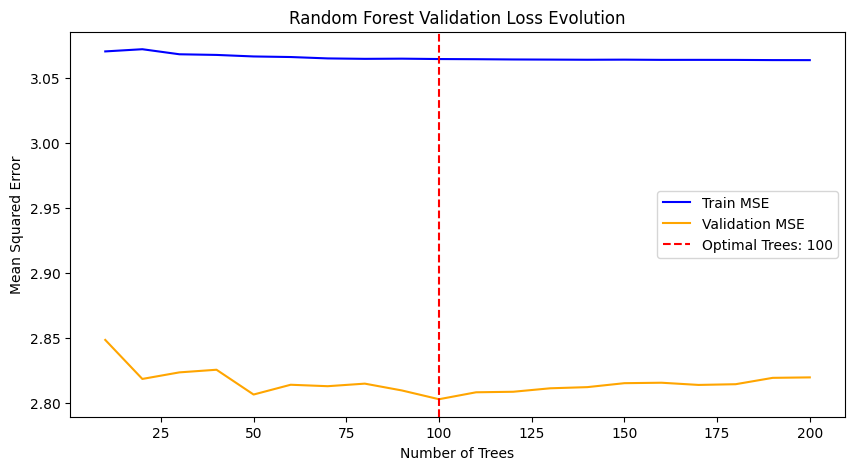

Plotting Validation Loss Evolution for Gradient Boosting...


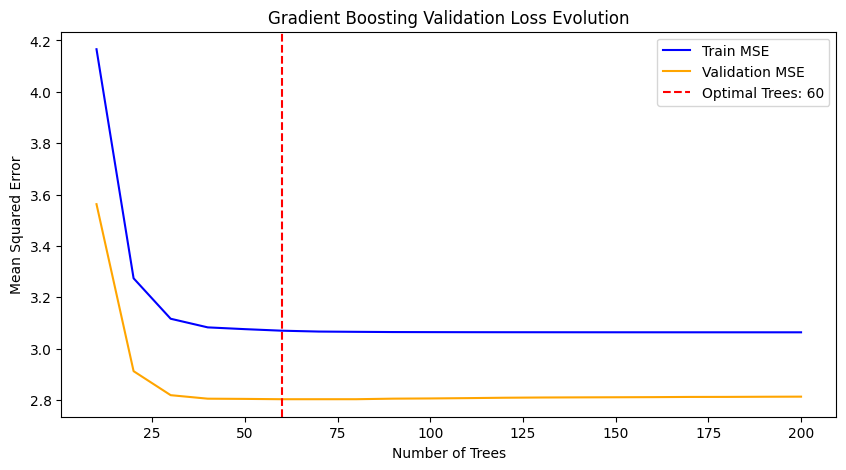

Plotting Validation Loss Evolution for XGBoost...


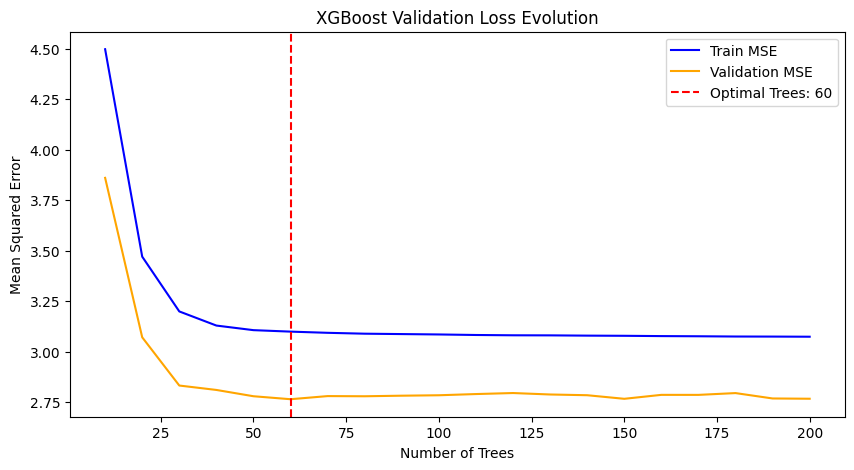

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define models dictionary correctly
tuned_models_best = {
    "Random Forest": rf_best,
    "Gradient Boosting": gbm_best,
    "XGBoost": xgb_best
}

# Function to track validation loss evolution
def plot_validation_loss(model, model_name, X_train, y_train, X_val, y_val, max_estimators=200):
    train_errors, val_errors = [], []

    for n in range(10, max_estimators + 10, 10):  # Train with increasing number of trees
        model.set_params(n_estimators=n)  # Modify only the number of estimators
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)  # Using validation set

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))  # Compute loss using validation set

    # Find the optimal number of trees
    optimal_trees = np.argmin(val_errors) * 10 + 10  # Best tree count

    # Plot the validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(10, max_estimators + 10, 10), train_errors, "b-", label="Train MSE")
    plt.plot(range(10, max_estimators + 10, 10), val_errors, "orange", label="Validation MSE")
    plt.axvline(optimal_trees, color='r', linestyle='--', label=f"Optimal Trees: {optimal_trees}")

    plt.xlabel("Number of Trees")
    plt.ylabel("Mean Squared Error")
    plt.title(f"{model_name} Validation Loss Evolution")
    plt.legend()
    plt.show()

# Generate validation loss evolution plots for all models using the validation set
for name, model in tuned_models_best.items():
    print(f"Plotting Validation Loss Evolution for {name}...")
    plot_validation_loss(model, name, X_train_tuned, y_train_tuned, X_val_tuned, y_val_tuned)


**Learning curve**

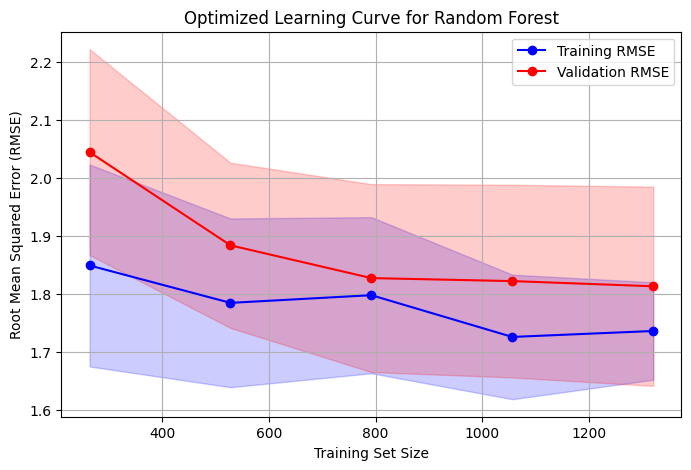

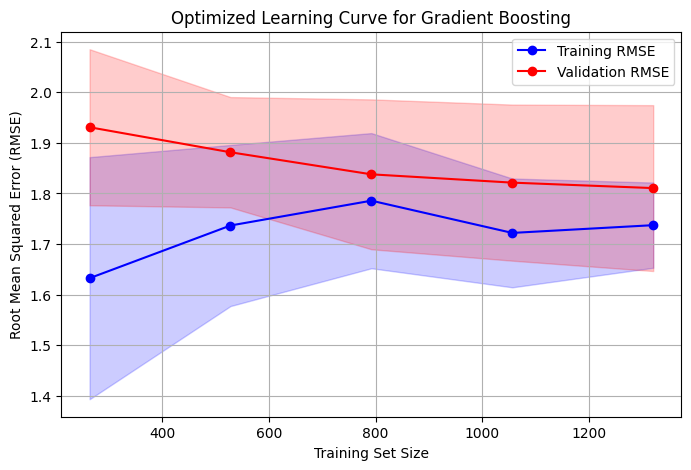

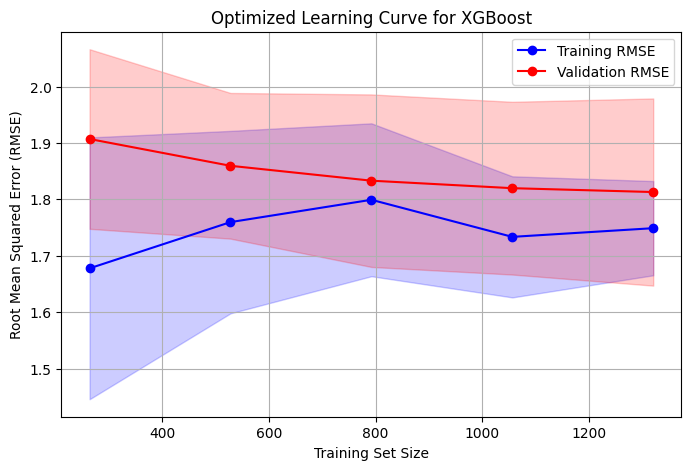

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, model_name, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=3, scoring="neg_root_mean_squared_error",
        train_sizes=np.linspace(0.2, 1.0, 5), n_jobs=-1
    )

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, "o-", color="b", label="Training RMSE")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)

    plt.plot(train_sizes, val_mean, "o-", color="r", label="Validation RMSE")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="r", alpha=0.2)

    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.title(f"Optimized Learning Curve for {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Generate learning curves for all tuned models
for name, model in tuned_models.items():
    best_model = model.best_estimator_  # Extract the best model from GridSearchCV
    best_model.set_params(n_estimators=50)  # Reduce n_estimators temporarily for speed
    plot_learning_curve(best_model, name, X_train_tuned, y_train_tuned)


**Feature Importance**

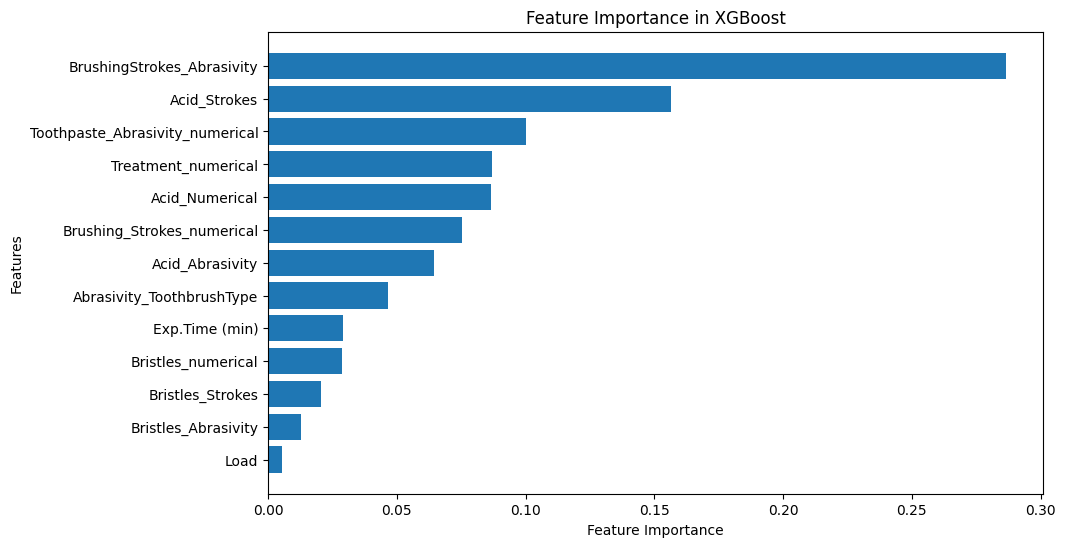

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = xgb_tuned.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(np.array(X_train_tuned.columns)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()


**Residual Analysis and Actual vs Predicted plot**

Generating plots for Random Forest...


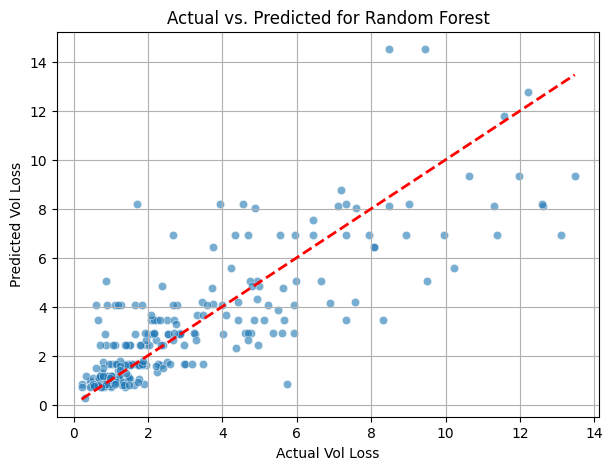

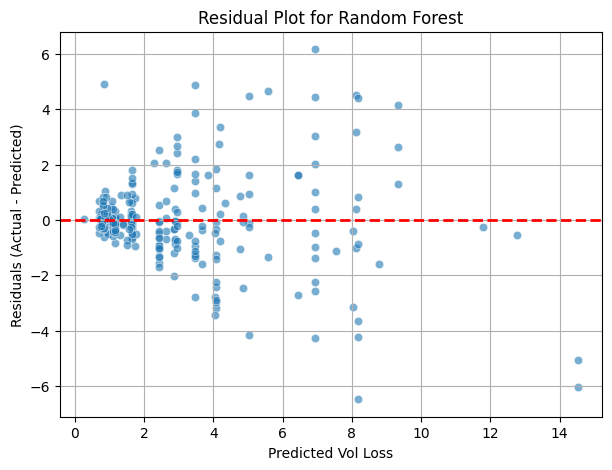

Generating plots for Gradient Boosting...


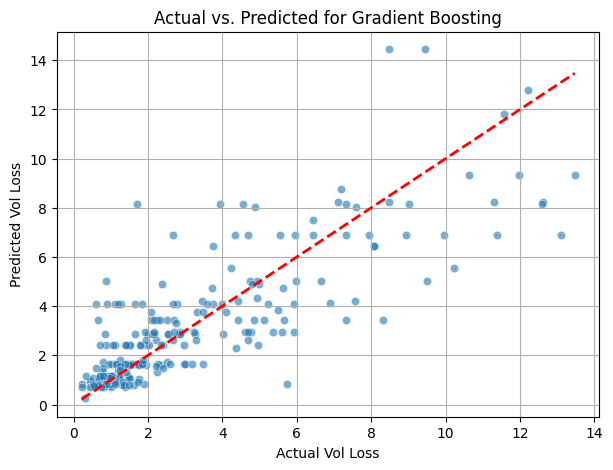

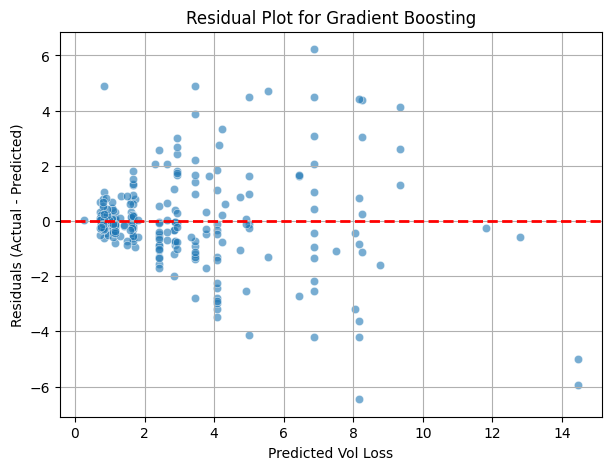

Generating plots for XGBoost...


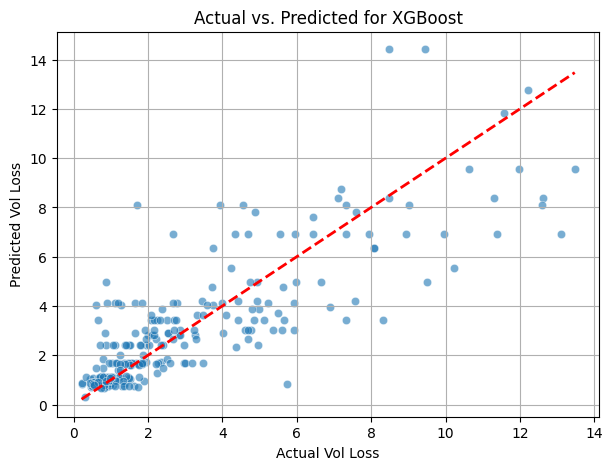

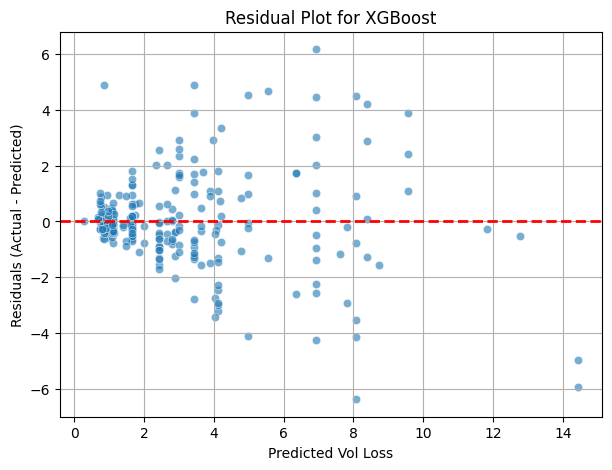

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot actual vs predicted scatterplot with distribution
def plot_actual_vs_predicted(y_actual, y_pred, model_name):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)  # Identity line
    plt.xlabel("Actual Vol Loss")
    plt.ylabel("Predicted Vol Loss")
    plt.title(f"Actual vs. Predicted for {model_name}")
    plt.grid(True)
    plt.show()

# Function to plot residuals scatterplot with distribution
def plot_residuals(y_actual, y_pred, model_name):
    residuals = y_actual - y_pred
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)  # Zero residual reference line
    plt.xlabel("Predicted Vol Loss")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot for {model_name}")
    plt.grid(True)
    plt.show()

# Loop through all trained models and generate plots
for model_name, model in tuned_models.items():
    print(f"Generating plots for {model_name}...")

    # Get predictions from the model on the validation set
    y_val_pred = model.predict(X_val_tuned)

    # Plot Actual vs Predicted (Validation Set)
    plot_actual_vs_predicted(y_val_tuned, y_val_pred, model_name)

    # Plot Residuals (Validation Set)
    plot_residuals(y_val_tuned, y_val_pred, model_name)


**Final evaluation using test set**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to evaluate model performance on test set
def evaluate_test_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    metrics = {
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    }

    return metrics

# Create dictionary to store results
test_results = {}

# Evaluate Baseline Models on Test Set
for name, model in baseline_models.items():
    test_results[f"{name} (Baseline)"] = evaluate_test_model(model, X_test_base, y_test_base)

# Evaluate Tuned Models on Test Set
for name, model in tuned_models.items():
    test_results[f"{name} (Tuned)"] = evaluate_test_model(model, X_test_tuned, y_test_tuned)

# Convert results to DataFrame for better visualization
test_results_df = pd.DataFrame(test_results).T
test_results_df


,Test RMSE,Test MAE,Test R²
Random Forest (Baseline),1.970565,1.230363,0.630741
Gradient Boosting (Baseline),1.960244,1.225459,0.634599
XGBoost (Baseline),1.971176,1.229084,0.630512
Random Forest (Tuned),1.970255,1.229995,0.630857
Gradient Boosting (Tuned),1.970579,1.228560,0.630736
XGBoost (Tuned),1.967453,1.223936,0.631907


**CHOICE OF MODEL**


1. Test RMSE Comparison  -

Gradient Boosting (Tuned) and XGBoost (Tuned) have very close test RMSE values, but XGBoost (Tuned) has a slightly lower RMSE of 1.967453 compared to Gradient Boosting's 1.970579. Random Forest, both baseline and tuned, shows similar RMSE values, indicating minor improvement.

2. Validation RMSE

XGBoost (Tuned) shows improvement in the validation RMSE from baseline to tuned (1.677787 to 1.663625), suggesting better generalization in the tuned version.XGBoost (Tuned) shows a significant improvement in the R² value from 0.667247 to 0.672841, indicating better predictive accuracy and fit on the validation set post-tuning.


3. R² Comparison

Gradient Boosting (Baseline) has the highest R² value of 0.634599, indicating it accounts for the most variability around the mean of the data. However, XGBoost (Tuned) is not far behind with an R² of 0.631907.

In conclusion, XGBoost (Tuned) appears to be the best performing model overall. It has the lowest RMSE and MAE among the tuned models and shows significant improvement in the R² value post-tuning.
Gradient Boosting (Baseline) performs admirably, especially in terms of R², but does not improve as much as XGBoost when tuned.


**Prediction**

In [ ]:
import numpy as np
import pandas as pd

# Get the feature names from the tuned model's training set
expected_feature_names = list(X_train_tuned.columns)

# Define the function for user input
def predict_volume_loss_tuned():
    print("\n🔹 Enter the necessary parameters to predict Volume Loss 🔹\n")

    # Collect numerical inputs
    numerical_inputs = {
        "Load": float(input("Enter Load: ")),
        "Exp.Time (min)": float(input("Enter Experiment Time (minutes): ")),
        "Toothpaste_Abrasivity_numerical": float(input("Enter Toothpaste Abrasivity (numerical): ")),
        "Brushing_Strokes_numerical": float(input("Enter Brushing Strokes (numerical): ")),
        "Acid_numerical": float(input("Enter Acid Level (numerical): ")),
        "Treatment_numerical": float(input("Enter Treatment (numerical): ")),
        "Bristles_numerical": int(input("Enter Bristles_numerical (1 for soft, 2 for Mid, 3 for hard): "))
    }

    # Collect categorical (encoded) inputs
    encoded_features = {
        "Head_Cross-multi-flex": int(input("Is Head_Cross-multi-flex present? (1 for Yes, 0 for No): ")),
        "Head_Cross-multi-rubbers": int(input("Is Head_Cross-multi-rubbers present? (1 for Yes, 0 for No): ")),
        "Head_Feathered": int(input("Is Head_Feathered present? (1 for Yes, 0 for No): ")),
        "Head_Flat-trimmed": int(input("Is Head_Flat-trimmed present? (1 for Yes, 0 for No): ")),
        "Head_Rippled": int(input("Is Head_Rippled present? (1 for Yes, 0 for No): "))
    }

    # Combine all inputs into a dictionary
    user_input_data = {**numerical_inputs, **encoded_features}

    # Convert to DataFrame
    user_input_df = pd.DataFrame([user_input_data])

    # **Ensure all interaction features are created dynamically**
    user_input_df["BrushingStrokes_Abrasivity"] = user_input_df["Brushing_Strokes_numerical"] * user_input_df["Toothpaste_Abrasivity_numerical"]
    user_input_df["Abrasivity_ToothbrushType"] = user_input_df["Toothpaste_Abrasivity_numerical"] * user_input_df["Head_Cross-multi-flex"]
    user_input_df["Acid_Strokes"] = user_input_df["Acid_numerical"] * user_input_df["Brushing_Strokes_numerical"]
    user_input_df["Acid_Abrasivity"] = user_input_df["Acid_numerical"] * user_input_df["Toothpaste_Abrasivity_numerical"]
    user_input_df["Bristles_Abrasivity"] = user_input_df["Bristles_numerical"] * user_input_df["Toothpaste_Abrasivity_numerical"]
    user_input_df["Bristles_Strokes"] = user_input_df["Bristles_numerical"] * user_input_df["Brushing_Strokes_numerical"]

    # **Ensure Acid_Numerical is created if missing**
    if "Acid_Numerical" not in user_input_df.columns:
        user_input_df["Acid_Numerical"] = user_input_df["Acid_Abrasivity"] / (user_input_df["Toothpaste_Abrasivity_numerical"] + 1e-8)  # Prevent division by zero

    # Ensure feature order matches the trained model
    missing_cols = [col for col in expected_feature_names if col not in user_input_df.columns]

    # Fill missing columns with 0
    for col in missing_cols:
        user_input_df[col] = 0

    user_input_df = user_input_df[expected_feature_names]  # Ensure order

    # Apply the same transformations as in training
    user_input_scaled = scaler.transform(user_input_df)

    # Make prediction using the **tuned XGBoost model**
    predicted_vol_loss = tuned_models["XGBoost"].predict(user_input_scaled)[0]

    # Fix negative predictions logically
    if predicted_vol_loss < 0:
        predicted_vol_loss = abs(predicted_vol_loss)  # Taking absolute value

    print("\n🔹 Predicted Volume Loss (mm³):", round(predicted_vol_loss, 4))

# Run the function
predict_volume_loss_tuned()



🔹 Enter the necessary parameters to predict Volume Loss 🔹

Enter Load: 200
Enter Experiment Time (minutes): 100
Enter Toothpaste Abrasivity (numerical): 1
Enter Brushing Strokes (numerical): 3
Enter Acid Level (numerical): 1
Enter Treatment (numerical): 1
Enter Bristles_numerical (1 for soft, 2 for Mid, 3 for hard): 3
Is Head_Cross-multi-flex present? (1 for Yes, 0 for No): 1
Is Head_Cross-multi-rubbers present? (1 for Yes, 0 for No): 0
Is Head_Feathered present? (1 for Yes, 0 for No): 0
Is Head_Flat-trimmed present? (1 for Yes, 0 for No): 0
Is Head_Rippled present? (1 for Yes, 0 for No): 0

🔹 Predicted Volume Loss (mm³): 8.1903
